# Training v5 - use decision trees 

without feature selection

In [3]:
# load in data

import pandas as pd
import pickle

with open('data/gdsc.pkl', 'rb') as f:
    gdsc1 = pickle.load(f)
    gdsc1_drugdata = pickle.load(f)
    gdsc2 = pickle.load(f)
    gdsc2_drugdata = pickle.load(f)

with open('data/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

with open('data/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

with open('data/preprocessed/processed_data2.pkl', 'rb') as f:
    xtrain = pickle.load(f)
    ylabel = pickle.load(f)
    ylabel_binary = pickle.load(f)
    index_to_sanger = pickle.load(f)

palbo = gdsc1.loc[gdsc1['DRUG_NAME'] == 'Palbociclib']
ln_ic50 = palbo['LN_IC50']
celllines = palbo['SANGER_MODEL_ID']

no_og_features = len(gene_entrez)-1

In [4]:
print(xtrain[1,:].shape)

(19221,)


In [13]:
from keras import models
from keras import layers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import numpy as np


def create_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model


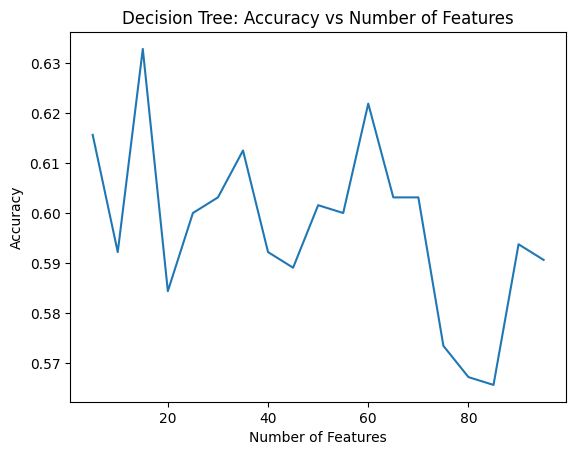

In [17]:
# selectKBest using f-classif

from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from numpy import std
from numpy import mean
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# disable user warnings and runtime warnings

import warnings
warnings.filterwarnings('ignore')


acc_y = []
feature_size_x = [] 

for k_val in range(5, 100, 5):
    # print(k_val)
    # create pipeline
    xtrain_k = SelectKBest(f_classif, k=k_val).fit_transform(xtrain, ylabel_binary)

    # define dataset
    X, y = xtrain_k, ylabel_binary
    # create pipeline

    model = DecisionTreeClassifier()
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(model, X, y, cv=kfold)
    # append results 
    acc_y.append(results.mean())
    feature_size_x.append(k_val)
    # print(k_val, results.mean())

# plot results

import matplotlib.pyplot as plt

plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Decision Tree: Accuracy vs Number of Features')
plt.show()


INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpd8sfsdqq\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpysvwqg4n\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpd7lpz0ij\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpg6ortqn7\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmptvdevp0q\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpfarb1qh3\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmp_pl5uoml\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpii36ojz9\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpqlv59j3s\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpn65ihjgk\assets
INFO:tensorflow:Assets written to: C:\Users\l8105\AppData\Local\Temp\tmpuh2cjaqr\assets
INFO:tensorflow:Assets written t

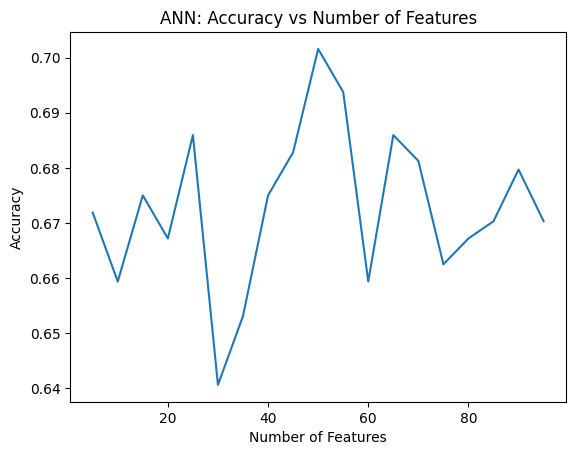

In [16]:

acc_y = []
feature_size_x = []

for k_val in range(5, 100, 5):
    # print(k_val)
    # create pipeline
    xtrain_k = SelectKBest(f_classif, k=k_val).fit_transform(
        xtrain, ylabel_binary)

    # define dataset
    X, y = xtrain_k, ylabel_binary
    # create pipeline

    model = KerasClassifier(model=create_model(input_shape=(k_val, )), epochs=20, batch_size=10, verbose=0)
    kfold = StratifiedKFold(n_splits=5, shuffle=True)
    results = cross_val_score(model, X, y, cv=kfold)
    # append results
    acc_y.append(results.mean())
    feature_size_x.append(k_val)
    print(k_val, results.mean())

# plot results


plt.plot(feature_size_x, acc_y)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('ANN: Accuracy vs Number of Features')
plt.show()
